In [ ]:
import numpy as np
from numpy import ones
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [ ]:
pop_size = 50
pop_dim= 20
generation_size = 500
u1 = np.array([[np.random.uniform(0,1) for i in range(pop_dim)]  for i in range(pop_size)])
u2 = np.array([[np.random.uniform(0,1) for i in range(pop_dim)] for i in range(pop_size)])

sns.set(style='darkgrid')
sns.set(font_scale=1)
plt.rcParams["figure.figsize"] = (12,6)

# Adaptive Evolution Strategy with 1/5 success rule

##Functions

In [ ]:
def initial (population,sigma):
  for i in range(pop_size):
    s = np.random.uniform(-100,100,pop_dim)
    sig = np.random.normal(0,1,pop_dim)
    population.append(s)
    sigma.append(sig)
  return population,sigma

def Griewank(x):
	part1 = 0
	for i in range(len(x)):
		part1 += x[i]**2
		part2 = 1
	for i in range(len(x)):
		part2 *= math.cos(float(x[i]) / math.sqrt(i+1))
	return 1 + (float(part1)/4000.0) - float(part2)

def fitness_Griewank (population):
  fitness=[]
  for chromosome in population:
    fitness.append(Griewank(chromosome))
  return fitness

def selectparent (population,sigma):
  parent=[]
  p_sigma=[]
  pindex=np.random.randint(pop_size)
  parent=population[pindex]
  p_sigma=sigma[pindex]
  return parent,p_sigma

def recom_discrete (parent1,parent2,p_sigma1,p_sigma2):
  child=ones(pop_dim)
  sig=ones(pop_dim)
  for i in range(pop_dim):
    if (np.random.rand()<0.5):
      child[i]=parent1[i]
      sig[i]=p_sigma1[i]
    else:
      child[i]=parent2[i]
      sig[i]=p_sigma2[i]
  return child,sig

def recom_intermediate (parent1,parent2,p_sigma1,p_sigma2):
  child=ones(pop_dim)
  sig=ones(pop_dim)
  for i in range(pop_dim):
    child[i]=(parent1[i]+parent2[i])/2
    sig[i]=(p_sigma1[i]+p_sigma2[i])/2
  return child,sig

def creatstep(sigma,count):
  s=np.array(sigma)
  n_sigma=[]
  if (count/len(sigma)) > 0.2:
    n_sigma = s/0.9
  elif (count/len(sigma)) < 0.2:
    n_sigma = s*0.9
  elif (count/len(sigma)) == 0.2:
    n_sigma = s
  return n_sigma.tolist()

def mutation(children,sigma):
  c = len(children)
  for i in range(len(children)):
    for j in range(pop_dim):
      rnChild = np.random.normal(0,1)
      children[i][j] = children[i][j] + (sigma[i][j]*rnChild)
  return children

def survive_select(candid_pop , candid_sigma , candid_fit ):
  condid = np.column_stack((candid_pop,candid_sigma,candid_fit))
  sorted_c = condid[ condid[:, -1].argsort()]
  selected_pop= sorted_c[ 0:pop_size , 0:pop_dim]
  selected_sig= sorted_c[ 0:pop_size , pop_dim:2*pop_dim]
  selected_fit= sorted_c[ 0:pop_size , -1]
  return selected_pop.tolist() , selected_sig.tolist() , selected_fit.tolist()


##ES with discrete recombination and MU + LAMBDA

Generation: 1 10.670270092202538
Generation: 2 9.202811163430404
Generation: 3 7.813971711364208
Generation: 4 5.968050168009956
Generation: 5 5.968050168009956
Generation: 6 4.5121375617459805
Generation: 7 4.362704234998344
Generation: 8 3.5478702760388727
Generation: 9 3.245751005569548
Generation: 10 2.5685291134655786
Generation: 11 1.8058118207782587
Generation: 12 1.8058118207782587
Generation: 13 1.8058118207782587
Generation: 14 1.8058118207782587
Generation: 15 1.7309036563539004
Generation: 16 1.7041993219136542
Generation: 17 1.5965303676732032
Generation: 18 1.5782726611462226
Generation: 19 1.5646445161724898
Generation: 20 1.5020785701970627
Generation: 21 1.4895457419164826
Generation: 22 1.4520821618815092
Generation: 23 1.441387241674137
Generation: 24 1.4300134428947628
Generation: 25 1.4288949851986958
Generation: 26 1.399791200350911
Generation: 27 1.3972371523244314
Generation: 28 1.3915444676046083
Generation: 29 1.3810576357633546
Generation: 30 1.37504129175306

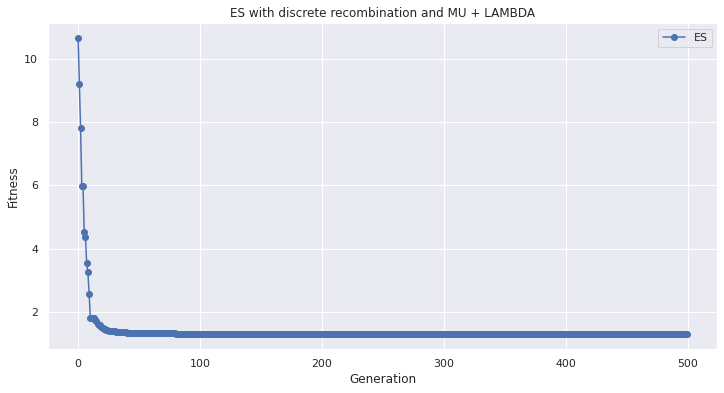

In [ ]:
def main():
  global list1_best_fitness1
  Population = []
  sigma = []
  Population,sigma = initial(Population,sigma)
  f = fitness_Griewank(Population)
  children = []
  c_sigma = []
  list1_best_fitness1=[]
  Generation=0
  while Generation != generation_size:
    for i in range(pop_size):
        parent1,p_sigma1=selectparent(Population,sigma)
        parent2,p_sigma2=selectparent(Population,sigma)
        child,sig=recom_discrete(parent1,parent2,p_sigma1,p_sigma2)
        children.append(child)
        c_sigma.append(sig)
    
    n_children=mutation(children,c_sigma)
    fo_child = fitness_Griewank(children)
    f_child = fitness_Griewank(n_children)
    Count=0
    for i in range(pop_size):
      if fo_child[i] > f_child[i]:
        Count+=1
    n_sigma = creatstep(c_sigma,Count)
    candid_pop=np.array(Population + n_children)
    candid_sigma = np.array(sigma + n_sigma)
    candid_fit =np.array(f + f_child)
    Population , sigma , f = survive_select(candid_pop , candid_sigma , candid_fit)
    list1_best_fitness1.append(f[0])
    Generation+=1
    print("Generation:",Generation , list1_best_fitness1[-1])

  plt.plot(list1_best_fitness1, 'b-o', label="ES")

  plt.title("ES with discrete recombination and MU + LAMBDA")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.legend()
  plt.show()

main()

##ES with intermediate recombination and MU + LAMBDA

Generation: 1 3.0314439845199046
Generation: 2 2.8066774200209146
Generation: 3 2.2703426958928117
Generation: 4 1.6359452737971172
Generation: 5 1.4374752535348805
Generation: 6 1.3239634729879535
Generation: 7 1.293781644092699
Generation: 8 1.2787282182842559
Generation: 9 1.2658554081099287
Generation: 10 1.264666133956311
Generation: 11 1.2535949605552754
Generation: 12 1.2528461025745623
Generation: 13 1.2517871985425888
Generation: 14 1.250995534475696
Generation: 15 1.2501294743625018
Generation: 16 1.2485565481086456
Generation: 17 1.2458420670948902
Generation: 18 1.2458420670948902
Generation: 19 1.2440997551674917
Generation: 20 1.243095333110082
Generation: 21 1.2423385207883328
Generation: 22 1.2418937348313646
Generation: 23 1.2415466793569976
Generation: 24 1.240772002613968
Generation: 25 1.2401762189527161
Generation: 26 1.239859120478574
Generation: 27 1.2386450875324349
Generation: 28 1.2376904393419672
Generation: 29 1.2366906688172161
Generation: 30 1.236115035772

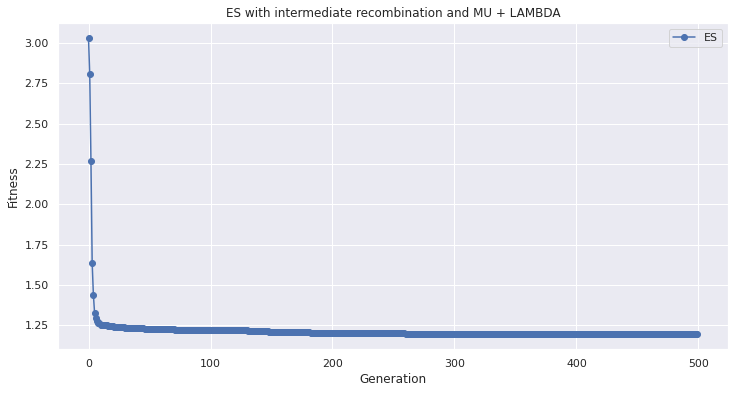

In [ ]:
def main():
  global list1_best_fitness2
  Population = []
  sigma = []
  Population,sigma = initial(Population,sigma)
  f = fitness_Griewank(Population)
  children = []
  c_sigma = []
  list1_best_fitness2=[]
  Generation=0
  while Generation != generation_size:
    for i in range(pop_size):
        parent1,p_sigma1=selectparent(Population,sigma)
        parent2,p_sigma2=selectparent(Population,sigma)
        child,sig=recom_intermediate(parent1,parent2,p_sigma1,p_sigma2)
        children.append(child)
        c_sigma.append(sig)
    
    n_children=mutation(children,c_sigma)
    fo_child = fitness_Griewank(children)
    f_child = fitness_Griewank(n_children)
    Count=0
    for i in range(pop_size):
      if fo_child[i] > f_child[i]:
        Count+=1
    n_sigma = creatstep(c_sigma,Count)
    candid_pop=np.array(Population + n_children)
    candid_sigma = np.array(sigma + n_sigma)
    candid_fit =np.array(f + f_child)
    Population , sigma , f = survive_select(candid_pop , candid_sigma , candid_fit)
    list1_best_fitness2.append(f[0])
    Generation+=1
    print("Generation:",Generation , list1_best_fitness2[-1])

  plt.plot(list1_best_fitness2, 'b-o', label="ES")

  plt.title("ES with intermediate recombination and MU + LAMBDA")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.legend()
  plt.show()
main()

##ES with discrete recombination and MU & LAMBDA

Generation: 1 7.820743818621253
Generation: 2 7.82423912208798
Generation: 3 6.935815781648538
Generation: 4 5.246416788287459
Generation: 5 4.067252686270595
Generation: 6 2.817509704247113
Generation: 7 2.1625953422462154
Generation: 8 2.185773663431704
Generation: 9 1.930024355946756
Generation: 10 1.8658722102233045
Generation: 11 1.5780922543241322
Generation: 12 1.5108913430052469
Generation: 13 1.5079819630358358
Generation: 14 1.4855362979649591
Generation: 15 1.3823232292733514
Generation: 16 1.3330898388690786
Generation: 17 1.284361446216958
Generation: 18 1.2602696250624434
Generation: 19 1.247959212674488
Generation: 20 1.2401733201129062
Generation: 21 1.225161345506868
Generation: 22 1.2175931655146228
Generation: 23 1.2171032980443652
Generation: 24 1.2126032666964497
Generation: 25 1.2101918429503344
Generation: 26 1.2094449606096882
Generation: 27 1.2046822249950668
Generation: 28 1.2015118701540917
Generation: 29 1.2005284909177998
Generation: 30 1.1970998155923553
G

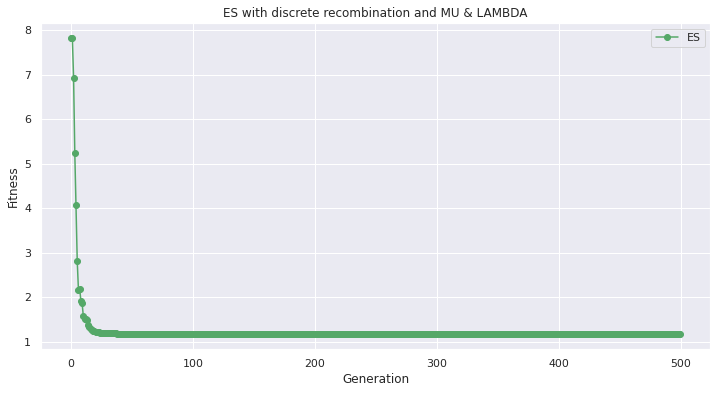

In [ ]:
def main():
  global list1_best_fitness3
  Population = []
  sigma = []
  Population,sigma = initial(Population,sigma)
  f = fitness_Griewank(Population)
  children = []
  c_sigma = []
  list1_best_fitness3=[]
  Generation=0
  while Generation != generation_size:
    for i in range(pop_size*3):
        parent1,p_sigma1=selectparent(Population,sigma)
        parent2,p_sigma2=selectparent(Population,sigma)
        child,sig=recom_discrete(parent1,parent2,p_sigma1,p_sigma2)
        children.append(child)
        c_sigma.append(sig)
    
    n_children=mutation(children,c_sigma)
    fo_child = fitness_Griewank(children)
    f_child = fitness_Griewank(n_children)
    Count=0
    for i in range(pop_size*3):
      if fo_child[i] > f_child[i]:
        Count+=1
    n_sigma = creatstep(c_sigma,Count)
    candid_pop=np.array(n_children)
    candid_sigma = np.array(n_sigma)
    candid_fit =np.array(f_child)
    Population , sigma , f = survive_select(candid_pop , candid_sigma , candid_fit)
    list1_best_fitness3.append(f[0])
    Generation+=1
    print("Generation:",Generation , list1_best_fitness3[-1])

  plt.plot(list1_best_fitness3, 'g-o', label="ES")

  plt.title("ES with discrete recombination and MU & LAMBDA")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.legend()
  plt.show()
  
main()

##ES with intermediate recombination and MU & LAMBDA

Generation: 1 5.574952796101442
Generation: 2 2.7382247769132144
Generation: 3 1.5188396429504074
Generation: 4 1.2954841674454904
Generation: 5 1.228992198758927
Generation: 6 1.177039816776046
Generation: 7 1.1737957627100888
Generation: 8 1.1660887959791553
Generation: 9 1.1639018282663482
Generation: 10 1.1622496225965482
Generation: 11 1.160235390377062
Generation: 12 1.1585515839324028
Generation: 13 1.1576718540861053
Generation: 14 1.1559580240903353
Generation: 15 1.1556237524290627
Generation: 16 1.1542764055275556
Generation: 17 1.1532278835386949
Generation: 18 1.152412401980336
Generation: 19 1.1513676882493284
Generation: 20 1.1505307687289945
Generation: 21 1.149451968782935
Generation: 22 1.1485218615890012
Generation: 23 1.1480558642459933
Generation: 24 1.1473227403472426
Generation: 25 1.1463391345663583
Generation: 26 1.1454948847153525
Generation: 27 1.1452159417615042
Generation: 28 1.1450584136761575
Generation: 29 1.1433593351999658
Generation: 30 1.142323605820

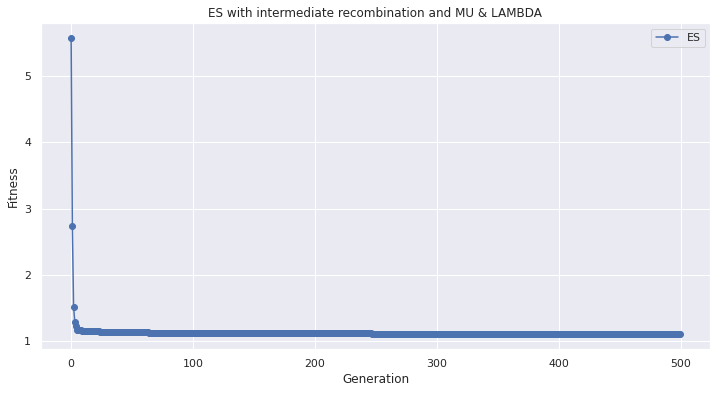

In [ ]:
def main():
  global list1_best_fitness4
  Population = []
  sigma = []
  Population,sigma = initial(Population,sigma)
  f = fitness_Griewank(Population)
  children = []
  c_sigma = []
  list1_best_fitness4=[]
  Generation=0
  while Generation != generation_size:
    for i in range(pop_size*3):
        parent1,p_sigma1=selectparent(Population,sigma)
        parent2,p_sigma2=selectparent(Population,sigma)
        child,sig=recom_intermediate(parent1,parent2,p_sigma1,p_sigma2)
        children.append(child)
        c_sigma.append(sig)
    
    n_children=mutation(children,c_sigma)
    fo_child = fitness_Griewank(children)
    f_child = fitness_Griewank(n_children)
    Count=0
    for i in range(pop_size*3):
      if fo_child[i] > f_child[i]:
        Count+=1
    n_sigma = creatstep(c_sigma,Count)
    candid_pop=np.array(n_children)
    candid_sigma = np.array(n_sigma)
    candid_fit =np.array(f_child)
    Population , sigma , f = survive_select(candid_pop , candid_sigma , candid_fit)
    list1_best_fitness4.append(f[0])
    Generation+=1
    print("Generation:",Generation , list1_best_fitness4[-1])

  plt.plot(list1_best_fitness4, 'b-o', label="ES")

  plt.title("ES with intermediate recombination and MU & LAMBDA")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.legend()
  plt.show()
  
main()

##Compare PLOT

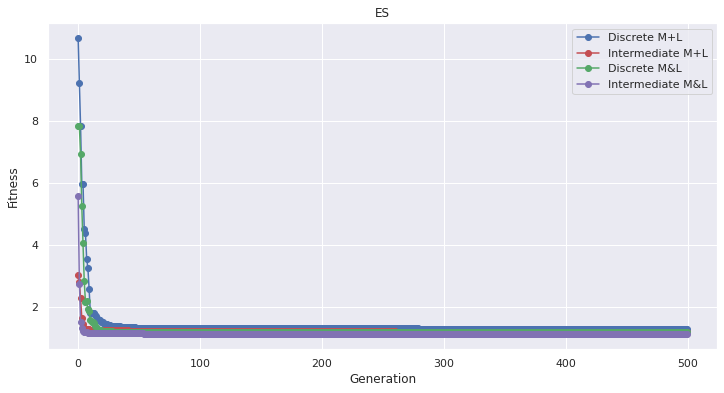

In [ ]:
plt.plot(list1_best_fitness1, 'b-o', label="Discrete M+L")
plt.plot(list1_best_fitness2, 'r-o', label="Intermediate M+L")
plt.plot(list1_best_fitness3, 'g-o', label="Discrete M&L")
plt.plot(list1_best_fitness4, 'm-o', label="Intermediate M&L")

plt.title("ES")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()

plt.show()

#Particle Swarm Optimisation

##Functions

In [ ]:
def initial_population(population_size, dim):
    bests = []
    population = []
    for i in range(population_size):
        chromosome = np.random.uniform(-100,100,dim)
        population.append(chromosome)
        bests.append(chromosome)
    population = np.array(population)
    bests = np.array(bests)
    best_f, best_gen = find_best_answer(population, dim)
    velocity = np.array(phi1*np.multiply(u1, bests - population) + phi2*np.multiply(u2, best_gen - population))
    bests = population
    return population, velocity, bests

def find_best_answer(population, dim=pop_dim):
    fitnesses = np.array([Griewank(x) for x in population])

    all = np.concatenate((population, fitnesses[:, None]), axis=1)
    all = np.array(sorted(all, key=lambda x: x[dim]))
    min_value = all[0,dim]
    genome = all[0,0:dim]
    return min_value, genome

def mutation(children, velocity, bests):
    new_children = []
    f, best_in_pop = find_best_answer(children)
    for i in range(pop_size):
        velocity[i] = w*velocity[i] + phi1*np.multiply(u1[i], (bests[i] - children[i])) + phi2*np.multiply(u2[i], (best_in_pop - children[i]))
        mutate_c = children[i] + velocity[i]
        if Griewank(mutate_c) < Griewank(children[i]):
            bests[i] = mutate_c
        new_children.append(mutate_c)
    new_children = np.array(new_children)
    return new_children, velocity, bests

##Test algorithm with W = 0.2

generation  1 10.197883653901327
generation  2 7.5995989189818465
generation  3 5.069960108718542
generation  4 3.8428012760983945
generation  5 3.2660758800111283
generation  6 2.8428726490988128
generation  7 2.6358497931797453
generation  8 2.579554074249517
generation  9 2.491206772036225
generation  10 2.479020420604191
generation  11 2.4024078629593393
generation  12 2.2427699720909255
generation  13 2.2186904513442682
generation  14 2.2148402403217275
generation  15 2.2141114796060775
generation  16 2.176505478735665
generation  17 2.0614396053658064
generation  18 2.0518935997390204
generation  19 2.0508376488301256
generation  20 2.0506611128335037
generation  21 2.050627192791199
generation  22 2.049232738299559
generation  23 2.0211497314767186
generation  24 2.008053314926504
generation  25 1.936782772300426
generation  26 1.8495371978722213
generation  27 1.7864502074594075
generation  28 1.7729880007850944
generation  29 1.7619338589049283
generation  30 1.757505062016283

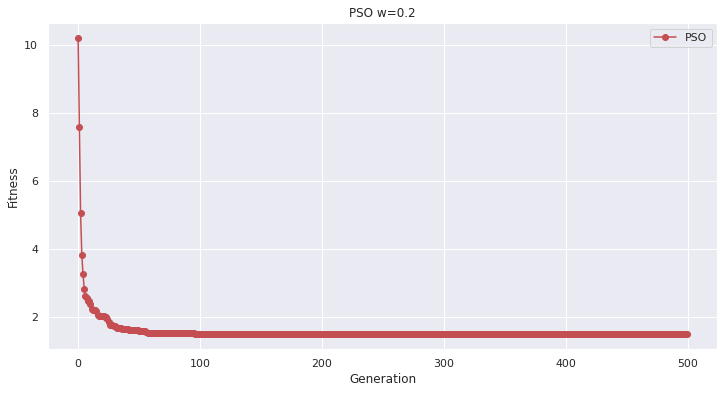

In [ ]:
w=0.2
phi1=0.7
phi2=0.4

def main():
    global list2_best_fitness1
    generation = 0
    list2_best_fitness1 = []
    population, velocity, bests = initial_population(pop_size, pop_dim)
    
    while generation < generation_size:
        a, b = find_best_answer(population, pop_dim)
        list2_best_fitness1.append(a)
        print('generation ', generation+1, a)
        population, velocity, bests = mutation(population, velocity=velocity, bests=bests)
        generation += 1
    plt.plot(list2_best_fitness1, 'r-o', label="PSO")

    plt.title("PSO w=0.2")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

main()

##Test algorithm with W = 0.4

generation  1 9.744889207956938
generation  2 7.579186897455025
generation  3 4.5539446881789996
generation  4 3.6920770531089055
generation  5 3.4618221899355834
generation  6 2.9921610670813004
generation  7 2.447669487458727
generation  8 2.3380177597767755
generation  9 2.2795882605924755
generation  10 2.186698901164696
generation  11 2.1307174089111176
generation  12 1.8485312120511896
generation  13 1.8018783882201832
generation  14 1.7188594751701172
generation  15 1.5986190196201269
generation  16 1.5747108541263857
generation  17 1.5704156777730018
generation  18 1.5637125143311161
generation  19 1.5426091552632955
generation  20 1.4395188632217817
generation  21 1.4118645159550223
generation  22 1.398813968817659
generation  23 1.3732410573825897
generation  24 1.3596254745268253
generation  25 1.3553142078231186
generation  26 1.3502917916382735
generation  27 1.334041411247182
generation  28 1.3240120277809269
generation  29 1.3164872160306755
generation  30 1.272267951752

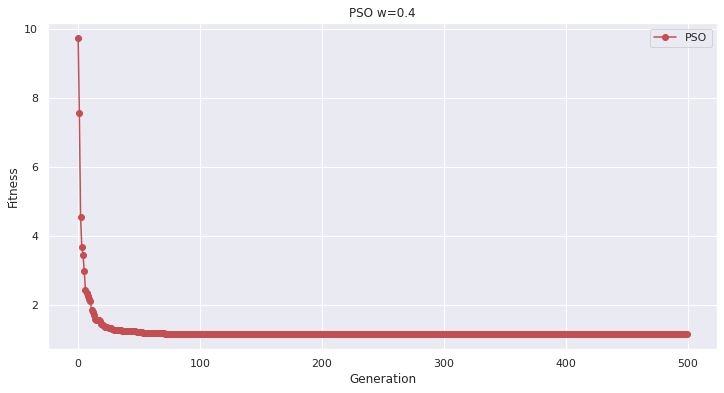

In [ ]:
w=0.4
phi1=0.7
phi2=0.4

def main():
    global list2_best_fitness2
    generation = 0
    list2_best_fitness2 = []
    population, velocity, bests = initial_population(pop_size, pop_dim)
    
    while generation < generation_size:
        a, b = find_best_answer(population, pop_dim)
        list2_best_fitness2.append(a)
        print('generation ', generation+1, a)
        population, velocity, bests = mutation(population, velocity=velocity, bests=bests)
        generation += 1
    plt.plot(list2_best_fitness2, 'r-o', label="PSO")

    plt.title("PSO w=0.4")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

main()

##Test algorithm with W = 0.6

generation  1 8.572958085192726
generation  2 5.552486277709381
generation  3 4.634592001269983
generation  4 3.3729568390176228
generation  5 2.653938967187814
generation  6 2.238421615190254
generation  7 2.0642310450432033
generation  8 1.9971831003526888
generation  9 1.9011982008974868
generation  10 1.7540383454364192
generation  11 1.6519879392867576
generation  12 1.5909297116392902
generation  13 1.5731480371960105
generation  14 1.5614663447389294
generation  15 1.558361612217944
generation  16 1.5565099249130208
generation  17 1.5547905382365312
generation  18 1.5541324461090416
generation  19 1.5538739560420816
generation  20 1.5537713195161826
generation  21 1.553591999845079
generation  22 1.5434058298435593
generation  23 1.5330709935154125
generation  24 1.5127054636369448
generation  25 1.5063449445338781
generation  26 1.5036854505305701
generation  27 1.4876227994247697
generation  28 1.482253066381836
generation  29 1.4805677831643902
generation  30 1.47996765490884

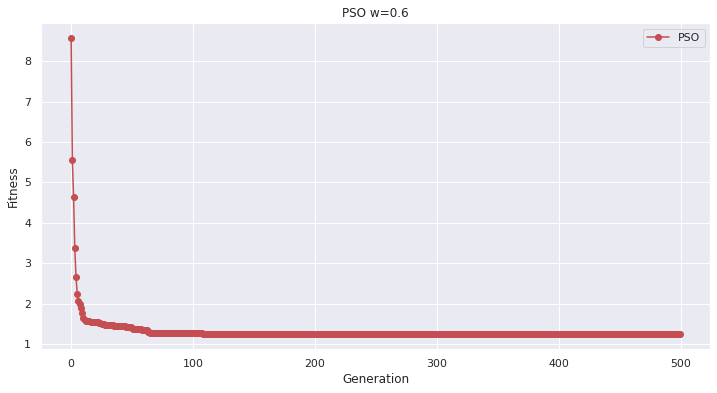

In [ ]:
W=0.6
phi1=0.1
phi2=0.3

def main():
    global list2_best_fitness3
    generation = 0
    list2_best_fitness3 = []
    population, velocity, bests = initial_population(pop_size, pop_dim)
    
    while generation < generation_size:
        a, b = find_best_answer(population, pop_dim)
        list2_best_fitness3.append(a)
        print('generation ', generation+1, a)
        population, velocity, bests = mutation(population, velocity=velocity, bests=bests)
        generation += 1
    plt.plot(list2_best_fitness3, 'r-o', label="PSO")

    plt.title("PSO w=0.6")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

main()

##Test algorithm with W = 0.8

generation  1 10.47724452683624
generation  2 6.127979508606446
generation  3 5.311041902938174
generation  4 5.539754169506762
generation  5 5.797181738330892
generation  6 5.475152898960131
generation  7 5.579006627711438
generation  8 5.325494729844148
generation  9 4.857229132240231
generation  10 4.514684590561556
generation  11 4.726056251425942
generation  12 4.466688177768013
generation  13 4.064195035731065
generation  14 3.5620704023799643
generation  15 3.2126403459253807
generation  16 3.117247049693991
generation  17 2.873724696305748
generation  18 2.6418872089984036
generation  19 2.3956140350022257
generation  20 2.1416530499363446
generation  21 2.099859052346217
generation  22 1.912790528766892
generation  23 1.8385183628676673
generation  24 1.7465547478624168
generation  25 1.6276991202656517
generation  26 1.5815699495308106
generation  27 1.4609921608394532
generation  28 1.4079746048319564
generation  29 1.376462144265857
generation  30 1.3671600157353112
generat

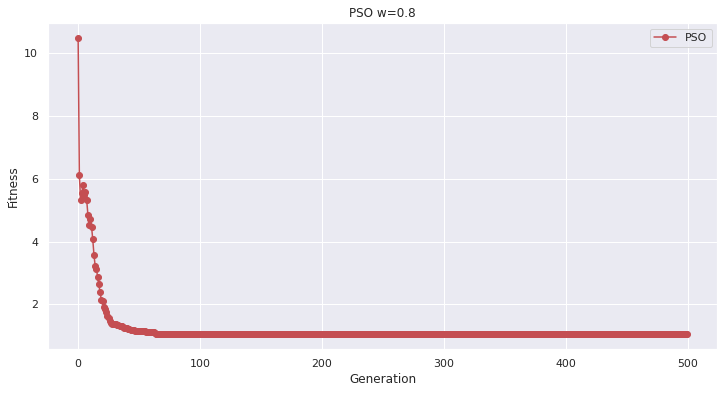

In [ ]:
w=0.8
phi1=0.1
phi2=0.3

def main():
    global list2_best_fitness4
    generation = 0
    list2_best_fitness4 = []
    population, velocity, bests = initial_population(pop_size, pop_dim)
    
    while generation < generation_size:
        a, b = find_best_answer(population, pop_dim)
        list2_best_fitness4.append(a)
        print('generation ', generation+1, a)
        population, velocity, bests = mutation(population, velocity=velocity, bests=bests)
        generation += 1
    plt.plot(list2_best_fitness4, 'r-o', label="PSO")

    plt.title("PSO w=0.8")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

main()

##Compare PLOT

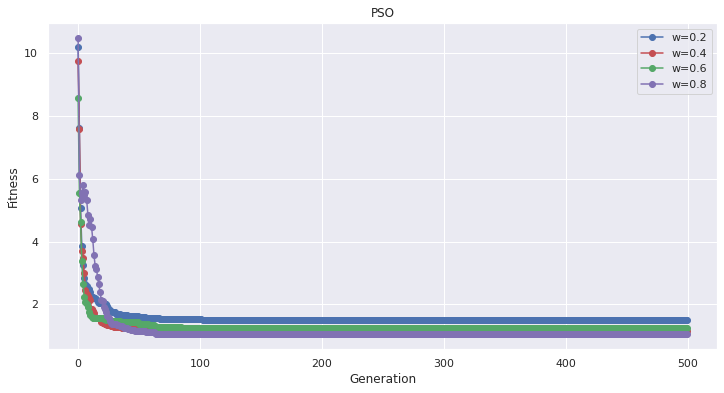

In [ ]:
plt.plot(list2_best_fitness1, 'b-o', label="w=0.2")
plt.plot(list2_best_fitness2, 'r-o', label="w=0.4")
plt.plot(list2_best_fitness3, 'g-o', label="w=0.6")
plt.plot(list2_best_fitness4, 'm-o', label="w=0.8")

plt.title("PSO")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()

plt.show()

#Differential Evolution

##Functions

In [ ]:
def initial_population(population_size, dim):
    population = []
    for i in range(population_size):
        chromosome = np.random.uniform(-100,100,dim)
        population.append(chromosome)
    return population

def find_best_answer(population, dim):
    fitnesses = np.array([Griewank(x) for x in population])

    all = np.concatenate((population, fitnesses[:, None]), axis=1)
    all = np.array(sorted(all, key=lambda x: x[dim]))
    min_value = all[0,dim]
    genome = all[0,0:dim]
    return min_value, genome

def Griewank(x):
    return 10*len(x) + sum(x**2 - 10 * np.cos(2 * np.pi * x))

def mutation(children):
    new_children = []
    F = 0.2
    for i in range(len(children)):
        indexes = [np.random.randint(0, len(children)) for i in range(3)]
        new_x = children[indexes[0]] + F * (children[indexes[1]] - children[indexes[2]])
        new_children.append(new_x)
        new_children.append(children[i])

    new_children = np.array(new_children)
    return new_children

def crossover(population, population_size, dim):
    children = []
    incriminator = 0
    while incriminator < population_size:
        parent1 = population[incriminator]
        incriminator += 1
        parent2 = population[incriminator]
        incriminator += 1
        r = np.random.randint(0, dim)
        tmp = np.concatenate((parent1[0:r],parent2[r:dim]), axis=0)
        tp = np.concatenate((parent2[0:r],parent1[r:dim]), axis=0)
        children.append(tmp)
        children.append(tp)

    children = np.array(children)

    return children

def generate_new_population(population, new_pop):
    increminator = 0
    survived_population = []
    while increminator < len(new_pop):
        genome1 = new_pop[increminator]
        increminator += 1
        genome2 = new_pop[increminator]
        increminator += 1
        if Griewank(genome1) < Griewank(genome2):
            survived_population.append(genome1)
        else:
            survived_population.append(genome2)
    survived_population = np.array(survived_population)
    return survived_population

def find_best_answer(population, dim):
    fitnesses = np.array([Griewank(x) for x in population])
    all = np.concatenate((population, fitnesses[:, None]), axis=1)
    all = np.array(sorted(all, key=lambda x: x[dim]))
    min_value = all[0,dim]
    genome = all[0,0:dim]
    return min_value, genome

##Algorithm

generation :  1 12.3756346992882
generation :  2 12.989802684091886
generation :  3 9.34979115029913
generation :  4 7.781937754437112
generation :  5 6.672574237712237
generation :  6 5.4341024388548105
generation :  7 5.919008891133953
generation :  8 4.8172047898564365
generation :  9 4.791275798487388
generation :  10 3.9500193580837712
generation :  11 4.460776110268761
generation :  12 3.573538006207873
generation :  13 3.3704756508959557
generation :  14 2.6113160074459554
generation :  15 2.6149752630328673
generation :  16 2.5060663357906465
generation :  17 2.521988856581503
generation :  18 2.549481215690285
generation :  19 2.446345357985945
generation :  20 2.1836323398261275
generation :  21 2.134340511728833
generation :  22 2.013383208817302
generation :  23 2.0429962770050687
generation :  24 1.9632341712028658
generation :  25 1.9585318828578115
generation :  26 1.9293769705973738
generation :  27 1.7566515984609585
generation :  28 1.755221238425052
generation :  29 

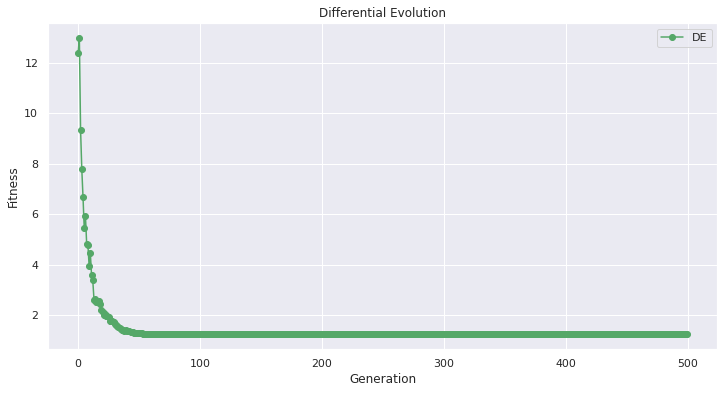

In [ ]:
def main():
    global list3_best_fitness
    list3_best_fitness = []
    generation = 0

    population = initial_population(pop_size, pop_dim)

    while generation < generation_size:
        a, b = find_best_answer(population, pop_dim)
        list3_best_fitness.append(a)
        print('generation : ', generation+1, a)

        children = mutation(population)
        children = crossover(children, pop_size, pop_dim)
        population = generate_new_population(population, children)
        generation += 1

    plt.plot(list3_best_fitness, 'g-o', label="DE")

    plt.title("Differential Evolution")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

main()

#Compare algorithms

In [ ]:
print("ES fitnesses: ")
print("\tES with discrete recombination and MU + LAMBDA: ",list1_best_fitness1[-1], 
      "\n\tES with intermediate recombination and MU + LAMBDA: ",list1_best_fitness2[-1], 
      "\n\tES with discrete recombination and MU & LAMBDA: ",list1_best_fitness3[-1], 
      "\n\tES with intermediate recombination and MU & LAMBDA: ",list1_best_fitness4[-1])

print("\nPSO fitnesses: ")
print("\tPSO w=0.2: ",list2_best_fitness1[-1], 
      "\n\tPSO w=0.4: ",list2_best_fitness2[-1], 
      "\n\tPSO w=0.6: ",list2_best_fitness3[-1], 
      "\n\tPSO w=0.8: ",list2_best_fitness4[-1])

print("\nDE fitnesses: ")
print("\tDE: ",list3_best_fitness[-1])

ES fitnesses: 
	ES with discrete recombination and MU + LAMBDA:  1.2797066616198893 
	ES with intermediate recombination and MU + LAMBDA:  1.1924389567725346 
	ES with discrete recombination and MU & LAMBDA:  1.1674099207357431 
	ES with intermediate recombination and MU & LAMBDA:  1.1023412285778136

PSO fitnesses: 
	PSO w=0.2:  1.4971122129800158 
	PSO w=0.4:  1.150309362946028 
	PSO w=0.6:  1.2341670667729003 
	PSO w=0.8:  1.0415991520961243

DE fitnesses: 
	DE:  1.2243604122716363


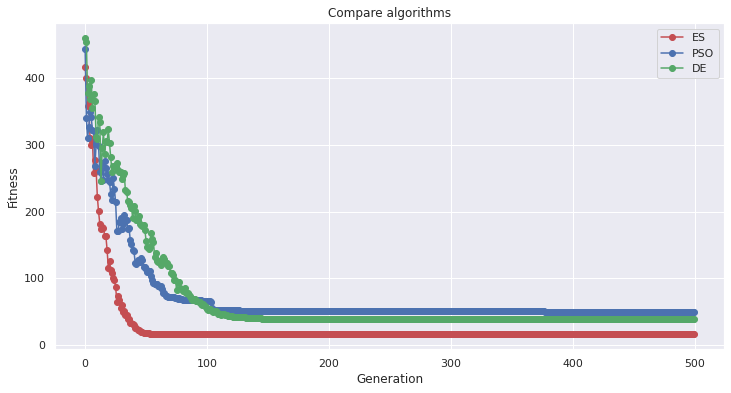

In [ ]:
plt.plot(list1_best_fitness3, 'r-o', label="ES")
plt.plot(list2_best_fitness4, 'b-o', label="PSO")
plt.plot(list3_best_fitness, 'g-o', label="DE")

plt.title("Compare algorithms")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.show()